In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Muestra todas las columnas de un DataFrame
sns.set(style="whitegrid", palette="viridis") # Define un estilo de graficos

# Carga de dataset
df = pd.read_csv("../data/raw/spain_energy.csv")

# Vista de las primeras 5 filas
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [31]:
# Tipos de datos y valores nulos
df.info()
# Estadísticas básicas
df.describe()
# Valores nulos por columna
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


datetime        0
id              0
name         5478
geoid       29256
geoname     29256
value           0
dtype: int64

In [32]:
df.describe()

,id,geoid,value
count,40212.000000,10956.000000,4.021200e+04
mean,2767.757286,2.000000,1.325967e+05
std,4014.664966,0.816534,2.147129e+05
min,3.000000,1.000000,-1.426133e+06
25%,600.000000,1.000000,5.112708e+01
50%,602.000000,2.000000,2.778778e+04
75%,1334.000000,3.000000,1.615399e+05
max,10258.000000,3.000000,2.584390e+06


In [33]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [34]:
df['name'].fillna('Desconocido', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\878799967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Desconocido', inplace=True)


In [35]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday


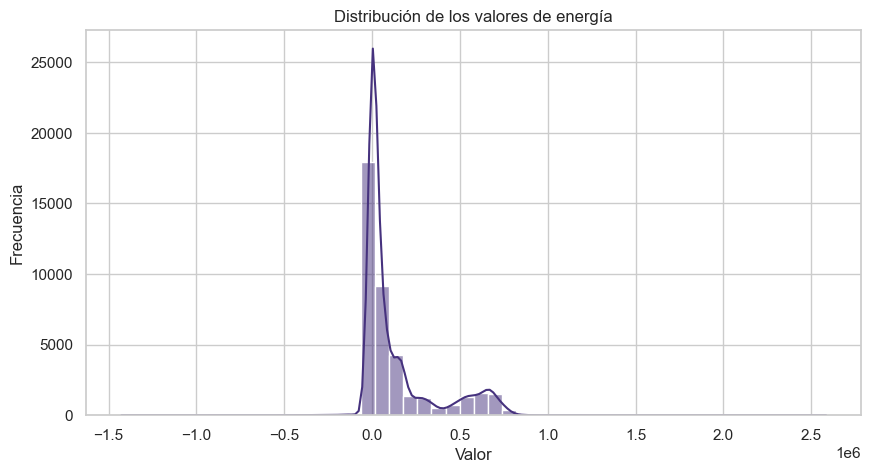

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['value'], bins=50, kde=True)
plt.title("Distribución de los valores de energía")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


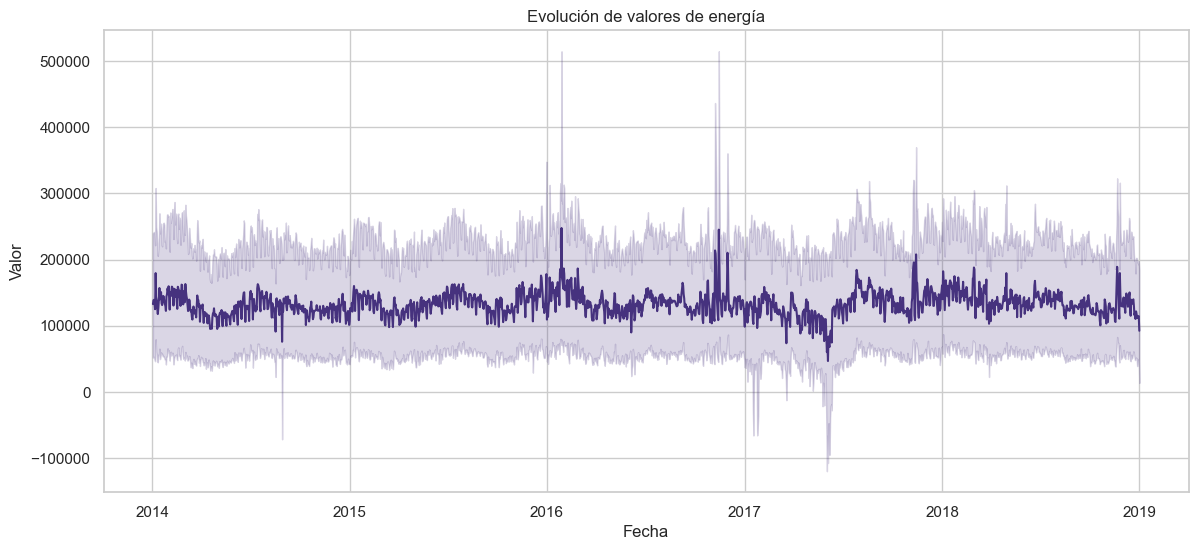

In [19]:
plt.figure(figsize=(14,6))
sns.lineplot(x='datetime', y='value', data=df)
plt.title("Evolución de valores de energía")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\1324914850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='value', data=hourly_avg, palette='viridis')


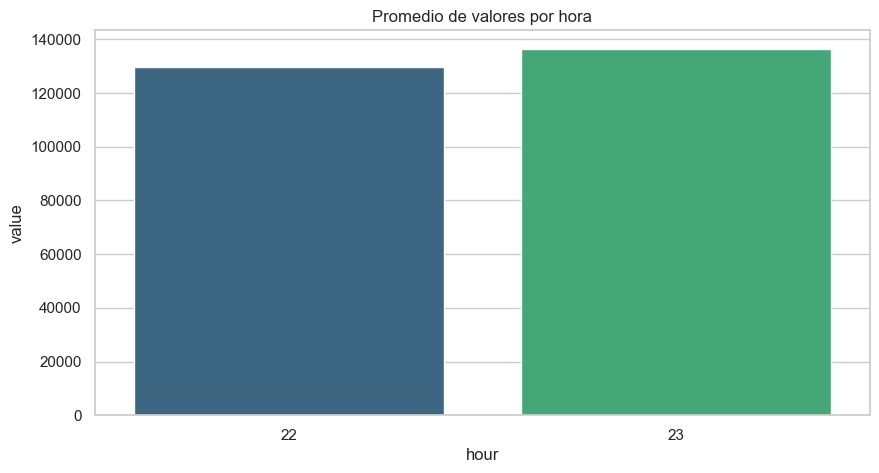

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\1324914850.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='value', data=weekday_avg, palette='viridis')


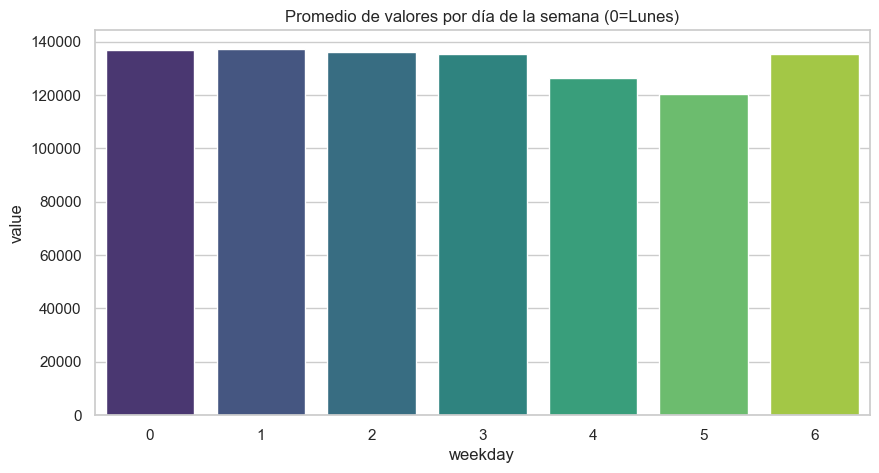

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\1324914850.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='value', data=monthly_avg, palette='viridis')


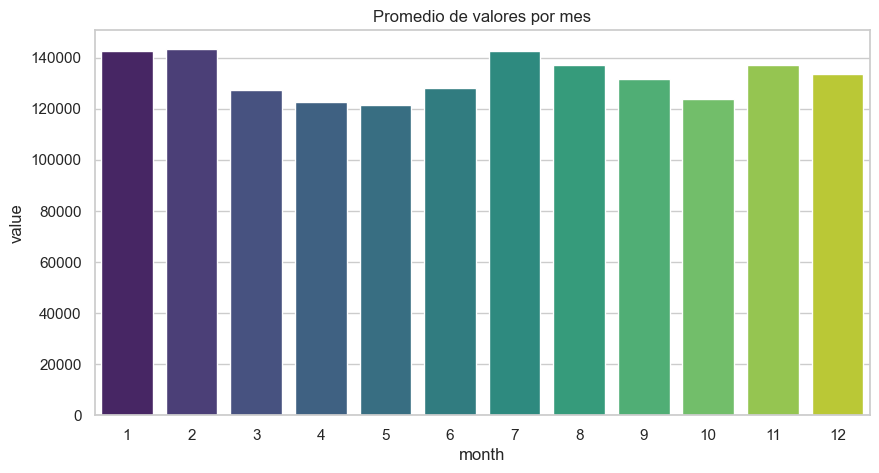

In [37]:
# Promedio por hora
hourly_avg = df.groupby('hour')['value'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='value', data=hourly_avg, palette='viridis')
plt.title("Promedio de valores por hora")
plt.show()

# Promedio por día de la semana
weekday_avg = df.groupby('weekday')['value'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='value', data=weekday_avg, palette='viridis')
plt.title("Promedio de valores por día de la semana (0=Lunes)")
plt.show()

# Promedio por mes
monthly_avg = df.groupby('month')['value'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='value', data=monthly_avg, palette='viridis')
plt.title("Promedio de valores por mes")
plt.show()


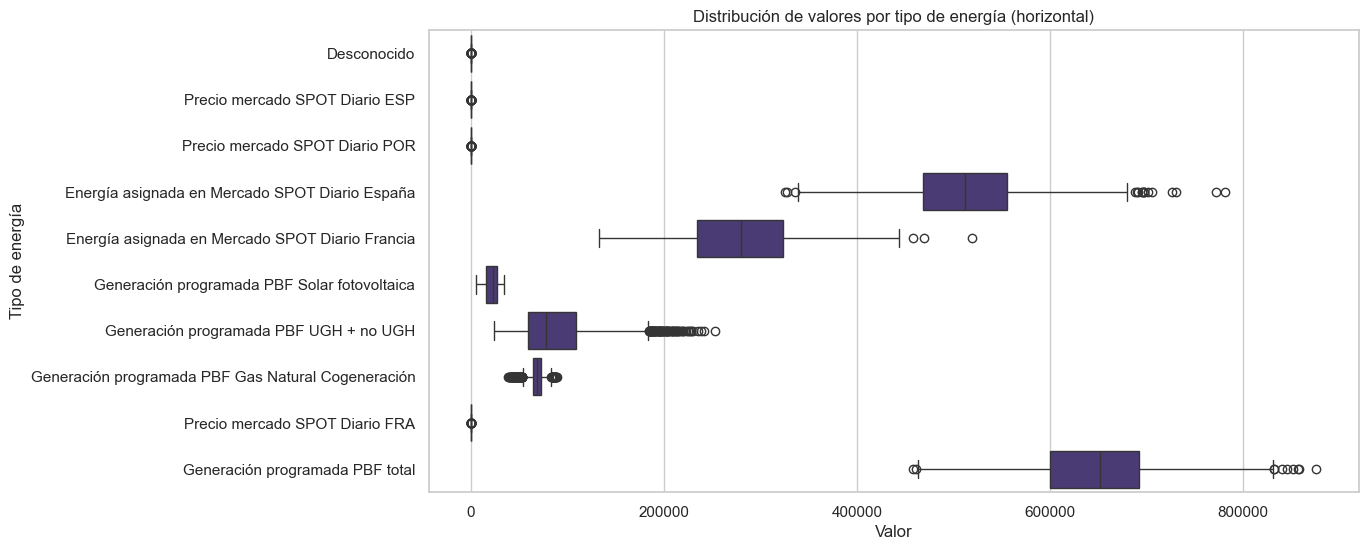

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(y='name', x='value', data=df[df['name'].isin(top_names)], order=top_names)
plt.title("Distribución de valores por tipo de energía (horizontal)")
plt.xlabel("Valor")
plt.ylabel("Tipo de energía")
plt.show()


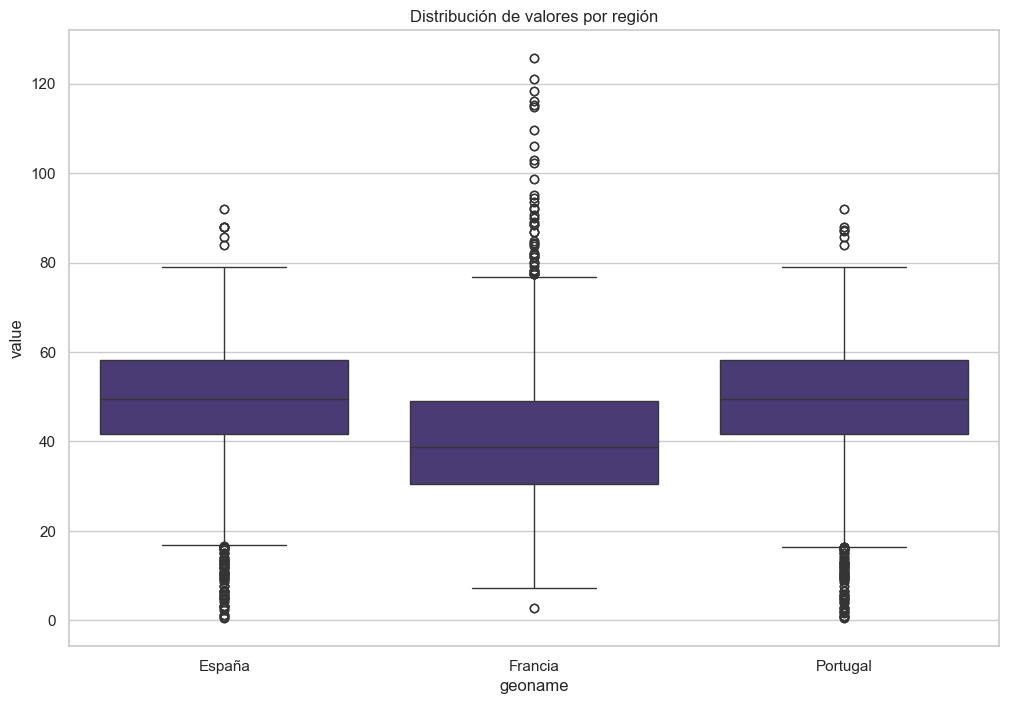

In [65]:
# Filtrar filas con información geográfica
geo_df = df.dropna(subset=['geoname'])

plt.figure(figsize=(12,8))
sns.boxplot(x='geoname', y='value', data=geo_df)
plt.title("Distribución de valores por región")
plt.xticks(rotation=0)
plt.show()


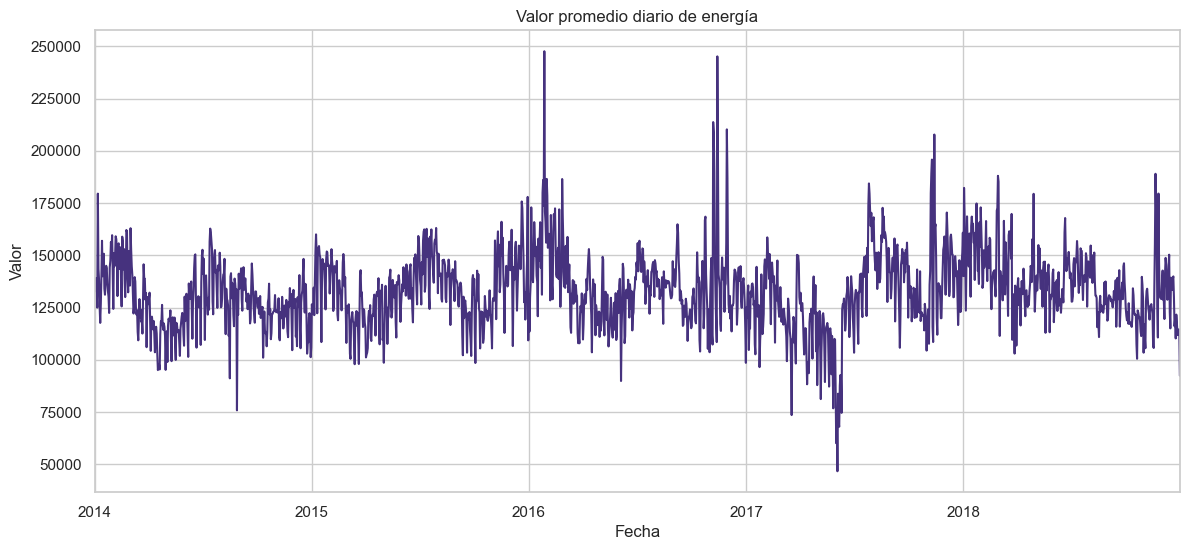

In [24]:
# Resample diario (promedio diario)
daily_avg = df.set_index('datetime').resample('D')['value'].mean()

plt.figure(figsize=(14,6))
daily_avg.plot()
plt.title("Valor promedio diario de energía")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()


In [38]:
# Filtrar filas con país conocido
df_countries = df[df['geoname'].isin(['España', 'Portugal', 'Francia'])]


    geoname      value
0    España  48.356157
2  Portugal  48.354966
1   Francia  41.015079


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\3959777161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geoname', y='value', data=country_mean, palette='viridis')


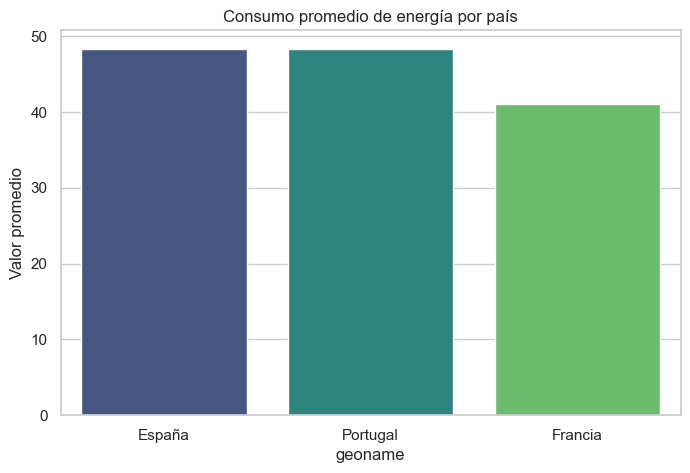

In [39]:
country_mean = df_countries.groupby('geoname')['value'].mean().reset_index()
country_mean = country_mean.sort_values('value', ascending=False)
print(country_mean)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x='geoname', y='value', data=country_mean, palette='viridis')
plt.title("Consumo promedio de energía por país")
plt.ylabel("Valor promedio")
plt.show()


    geoname      value
1   Francia  15.459300
2  Portugal  13.811781
0    España  13.758975


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\35648864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geoname', y='value', data=country_std, palette='viridis')


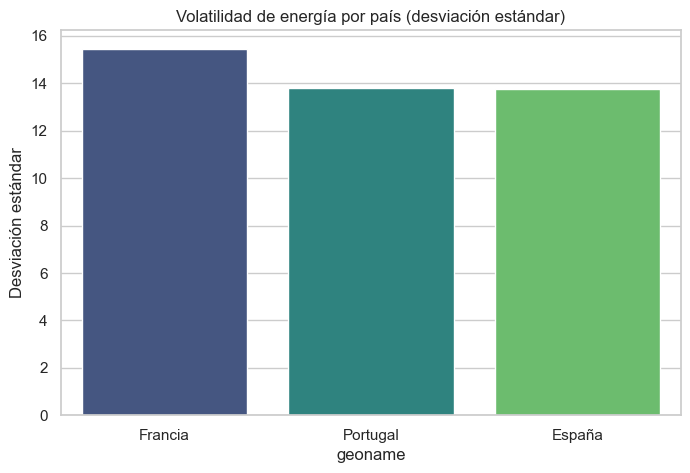

In [40]:
country_std = df_countries.groupby('geoname')['value'].std().reset_index()
country_std = country_std.sort_values('value', ascending=False)
print(country_std)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x='geoname', y='value', data=country_std, palette='viridis')
plt.title("Volatilidad de energía por país (desviación estándar)")
plt.ylabel("Desviación estándar")
plt.show()


In [41]:
# Filtrar países
df_countries = df[df['geoname'].isin(['España', 'Portugal', 'Francia'])]

# Calcular consumo promedio y volatilidad
country_stats = df_countries.groupby('geoname')['value'].agg(['mean','std']).reset_index()
country_stats.rename(columns={'mean':'Promedio', 'std':'Volatilidad'}, inplace=True)
print(country_stats)


    geoname   Promedio  Volatilidad
0    España  48.356157    13.758975
1   Francia  41.015079    15.459300
2  Portugal  48.354966    13.811781


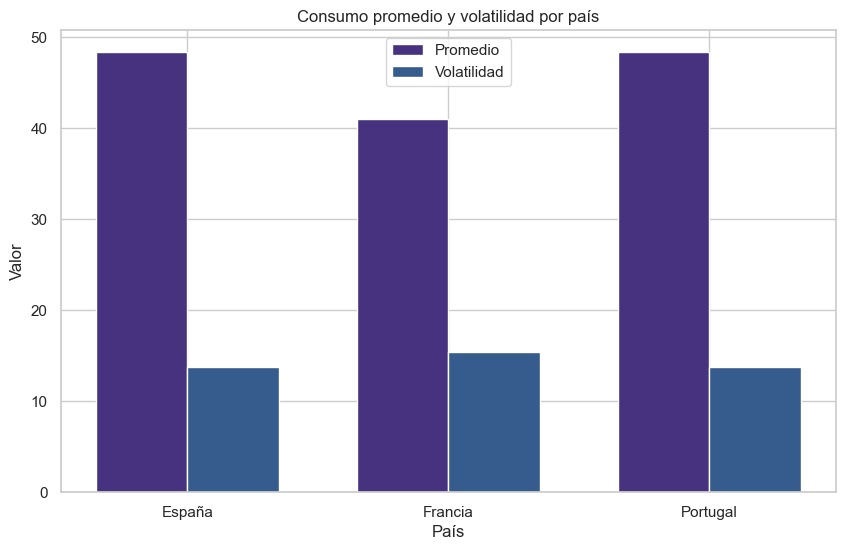

In [42]:
import numpy as np

x = np.arange(len(country_stats['geoname']))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width/2, country_stats['Promedio'], width, label='Promedio')
ax.bar(x + width/2, country_stats['Volatilidad'], width, label='Volatilidad')

ax.set_xlabel('País')
ax.set_ylabel('Valor')
ax.set_title('Consumo promedio y volatilidad por país')
ax.set_xticks(x)
ax.set_xticklabels(country_stats['geoname'])
ax.legend()

plt.show()


In [43]:
# Filtrar países
df_countries = df[df['geoname'].isin(['España', 'Portugal', 'Francia'])]

# Establecer datetime como índice
df_countries.set_index('datetime', inplace=True)

# Calcular volatilidad mensual (desviación estándar) por país
monthly_volatility = df_countries.groupby('geoname')['value'].resample('M').std().reset_index()
monthly_volatility.rename(columns={'value':'Volatilidad'}, inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8788\816229729.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = df_countries.groupby('geoname')['value'].resample('M').std().reset_index()


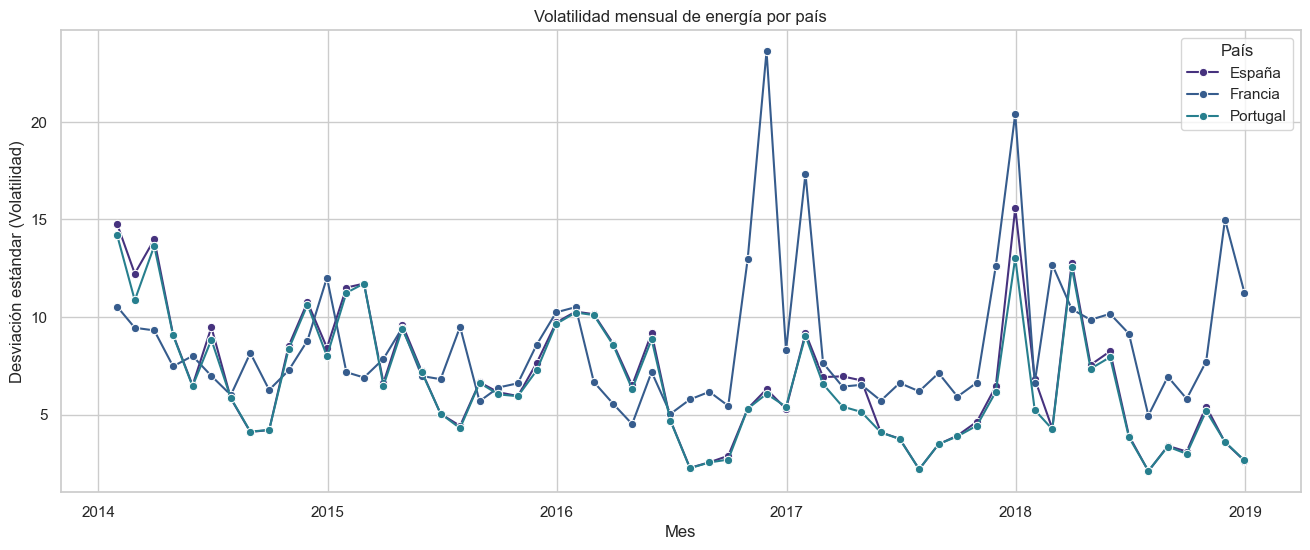

In [44]:
plt.figure(figsize=(16,6))
sns.lineplot(x='datetime', y='Volatilidad', hue='geoname', data=monthly_volatility, marker='o')
plt.title("Volatilidad mensual de energía por país")
plt.xlabel("Mes")
plt.ylabel("Desviación estándar (Volatilidad)")
plt.legend(title="País")
plt.show()


In [46]:
# Calcular umbral por país
thresholds = df_countries.groupby('geoname')['value'].mean() + 3 * df_countries.groupby('geoname')['value'].std()

# Unir los umbrales con el dataframe
df_countries = df_countries.reset_index()
df_countries = df_countries.merge(thresholds.rename('umbral'), on='geoname')

# Filtrar valores que superen el umbral
spikes = df_countries[df_countries['value'] > df_countries['umbral']]
print(spikes[['datetime','geoname','value']])


                 datetime   geoname       value
1119  2017-01-24 23:00:00    España   91.883333
2866  2016-11-06 23:00:00   Francia  125.673333
2867  2016-11-07 23:00:00   Francia  114.817083
2868  2016-11-08 23:00:00   Francia   88.347500
2873  2016-11-13 23:00:00   Francia  118.327500
2889  2016-11-29 23:00:00   Francia   90.654583
2890  2016-11-30 23:00:00   Francia  102.995833
2936  2017-01-15 23:00:00   Francia   88.635833
2937  2017-01-16 23:00:00   Francia  106.117917
2938  2017-01-17 23:00:00   Francia   94.490417
2939  2017-01-18 23:00:00   Francia   92.227917
2940  2017-01-19 23:00:00   Francia   98.597083
2943  2017-01-22 23:00:00   Francia   93.646250
2944  2017-01-23 23:00:00   Francia  116.083750
2945  2017-01-24 23:00:00   Francia  121.097083
2946  2017-01-25 23:00:00   Francia  109.679583
3233  2017-11-08 23:00:00   Francia   89.941667
3259  2017-12-04 23:00:00   Francia   91.903750
3609  2018-11-19 23:00:00   Francia   95.190000
3610  2018-11-20 23:00:00   Francia  115

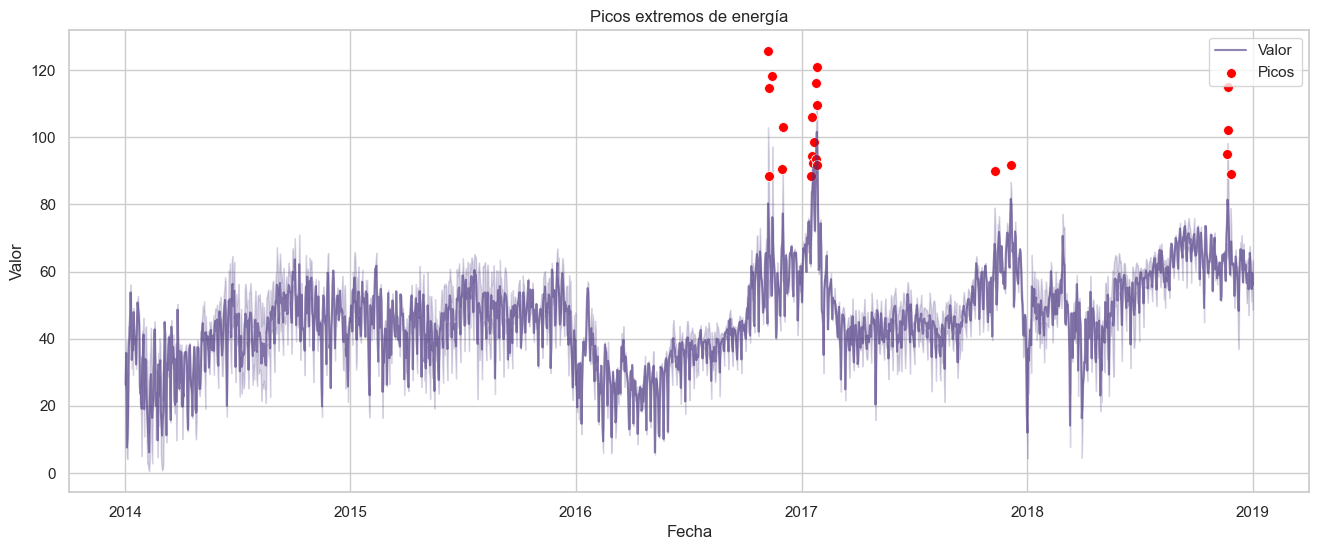

In [54]:
plt.figure(figsize=(16,6))
sns.lineplot(x='datetime', y='value', data=df_countries, alpha=0.6, label='Valor')
sns.scatterplot(x='datetime', y='value', data=spikes, color='red', s=50, label='Picos')
plt.title("Picos extremos de energía")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()


In [62]:
# --- Eliminamos si ya existe la columna 'umbral'
if 'umbral' in df_countries.columns:
    df_countries = df_countries.drop(columns='umbral')

# --- Función para obtener la estación
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# --- Agregamos la columna de estación
df_countries['season'] = df_countries['month'].apply(get_season)

# --- Calculamos umbral dinámico (media + 3*desvío por país)
thresholds = (
    df_countries.groupby('geoname')['value'].mean() +
    3 * df_countries.groupby('geoname')['value'].std()
)

# --- Fusionamos el umbral
df_countries = df_countries.merge(thresholds.rename('umbral'), on='geoname')

# --- Detectamos los picos (valores mayores al umbral)
spikes = df_countries[df_countries['value'] > df_countries['umbral']]

# --- Agrupamos picos por país y estación
print(spikes.groupby(['geoname', 'season']).size())


geoname   season  
España    Invierno     2
Francia   Invierno    20
          Otoño       22
Portugal  Invierno     2
dtype: int64


    geoname    season  num_picos
0    España  Invierno          2
1   Francia  Invierno         20
2   Francia     Otoño         22
3  Portugal  Invierno          2


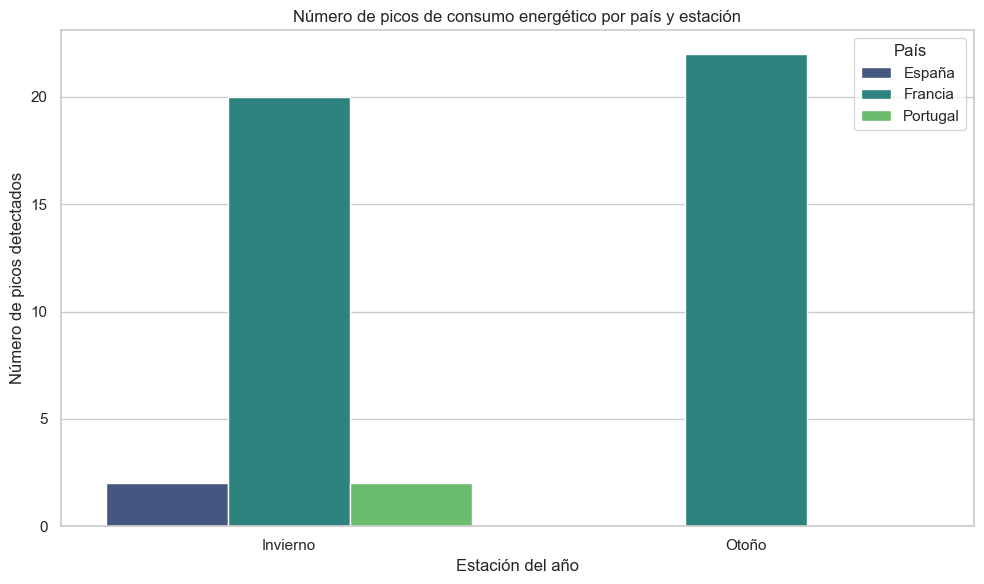

In [ ]:

# --- Agrupar y contar picos por país y estación ---
spike_counts = spikes.groupby(['geoname', 'season']).size().reset_index(name='num_picos')
print(spike_counts)

# --- Gráfico de barras comparando picos por estación y país ---
plt.figure(figsize=(10, 6))
sns.barplot(data=spike_counts, x='season', y='num_picos', hue='geoname', palette='viridis')

plt.title('Número de picos de consumo energético por país y estación')
plt.xlabel('Estación del año')
plt.ylabel('Número de picos detectados')
plt.legend(title='País')
plt.tight_layout()
plt.show()


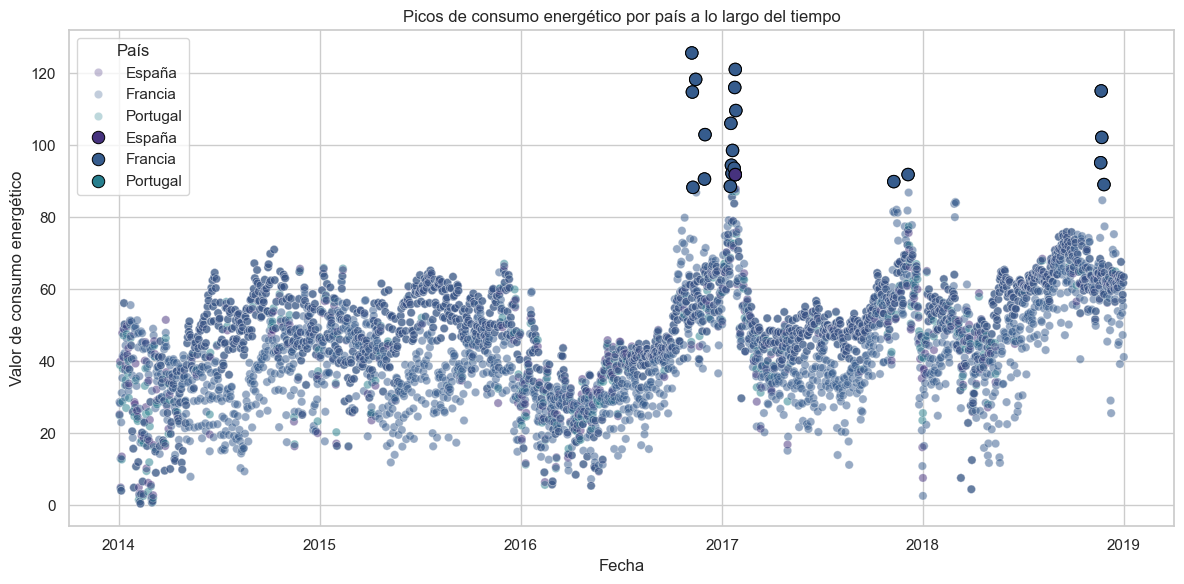

In [66]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_countries, x='datetime', y='value', hue='geoname', alpha=0.3)
sns.scatterplot(data=spikes, x='datetime', y='value', hue='geoname', s=80, marker='o', edgecolor='black')

plt.title('Picos de consumo energético por país a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de consumo energético')
plt.legend(title='País', loc='upper left')
plt.tight_layout()
plt.show()